# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [64]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

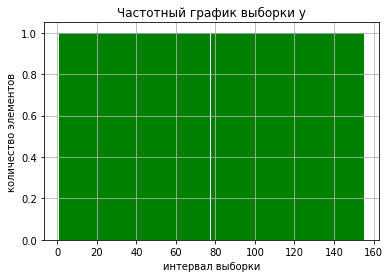

In [66]:
plt.hist(df['Positive affect'], 156, facecolor='g')
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки y')
plt.grid(True)
plt.show()

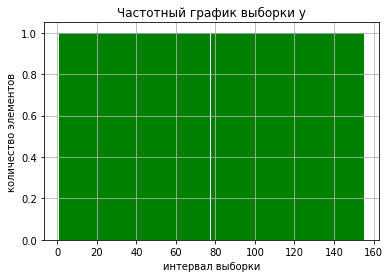

In [65]:
plt.hist(df['Freedom'], 156, facecolor='g')
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки y')
plt.grid(True)
plt.show()

в колонке freedom равномерное распределение с одним пропущенным значением

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [58]:
freedom = df.loc[df['Freedom'].notna(), 'Freedom']

In [59]:
statistics.median(freedom)

78.0

In [60]:
statistics.mean(freedom)

78.0

In [72]:
try :
    statistics.mode(freedom)
except  statistics.StatisticsError:
    print('моду определить нельзя, набор не повторяющихся элементов')

моду определить нельзя, набор не повторяющихся элементов


In [61]:
statistics.pstdev(freedom)

44.74371464239419

In [77]:
statistics.pvariance(freedom)

2002.0

In [75]:
min(freedom)

1.0

In [76]:
max(freedom)

155.0

In [78]:
max(freedom) - min(freedom)

154.0

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

In [80]:
df_without_missing = df.loc[df['Freedom'].notna(), ['Freedom','Positive affect']]

Коэффициент корреляции Пирсона: 0.6817698430601656
Свобода коррелирует с позитивом, корреляция больше 0,5, чем больше свободы, тем больше позитива


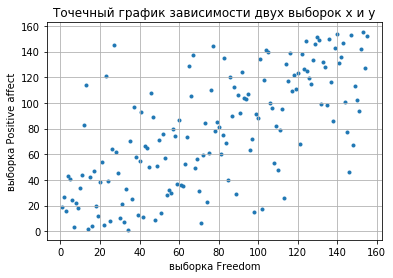

In [88]:
x  = df_without_missing['Freedom']
y = df_without_missing['Positive affect']
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
from scipy.stats import pearsonr
corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)
print('Свобода коррелирует с позитивом, корреляция больше 0,5, чем больше свободы, тем больше позитива')

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [90]:
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

0.0
[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

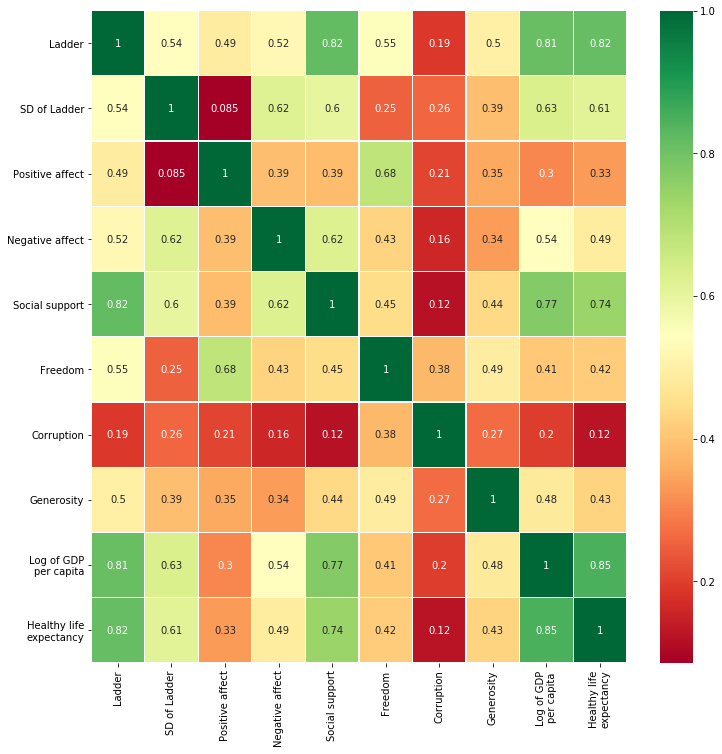

In [91]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()


Загрузить следующую таблицу: 

In [92]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

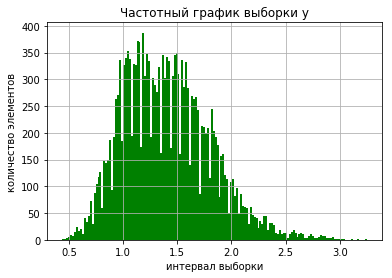

In [93]:
plt.hist(df['AveragePrice'], 156, facecolor='g')
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки y')
plt.grid(True)
plt.show()

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

Коэффициент корреляции Пирсона: -0.20831704848788477


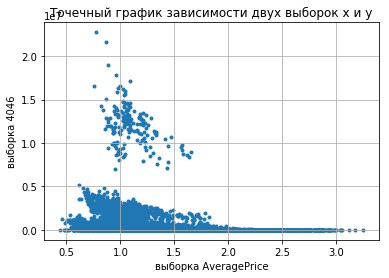

In [96]:
y  = df['4046']
x = df['AveragePrice']
plt.xlabel('выборка AveragePrice')
plt.ylabel('выборка 4046')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
from scipy.stats import pearsonr
corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

корреляция есть 